# Telco Customer Churn 
# (What factors that affect on your Churn)
## by (Abrar Ali Mohammed)

## Preliminary Wrangling

> These data includes information about 7043 customers for phone company that want to analysis what factors that affect on customers to churn to another company and obtains 21 different characteristics of their phone serveces and their fetures compared to if they churn or not.Varibles include Phone Service, Internet Service, TechSupport, Payment Method, contract, TotalCharges and others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#load the dataset
df= pd.read_csv('churn.csv')

In [3]:
#explor the data
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#convert TotalCharges column from object to float type
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
#look at brief summary of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### What is the structure of your dataset?

> 7043 rows and 21 columns 

### What is/are the main feature(s) of interest in your dataset?

> Churn column the important feature of interest that it be compared with other factors .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> features that affect on Churn column ratio include (Phone Service, Internet Service, TechSupport, Payment Method)

## Univariate Exploration


Let's start our exploration by looking at the main variable of interest:churn percentage and investigate other factors.

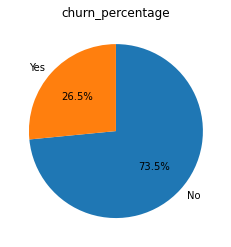

In [7]:
#look at churn percentage.
churn_percentage= df['Churn'].value_counts()
plt.pie(churn_percentage, autopct='%.1f%%', labels = churn_percentage.index, startangle = 90, counterclock = False);
plt.title('churn_percentage');

the ratio of churn customers is approxmetly 27 % of total customers

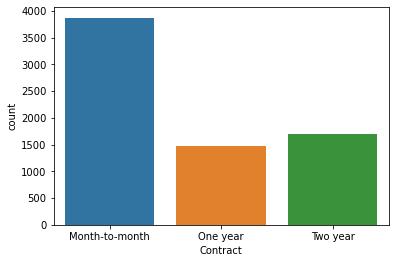

In [8]:
#look at contract factor.
sb.countplot(data= df,x= 'Contract' );

month to month contract have the highest number of customers compared to one  and two year contract.

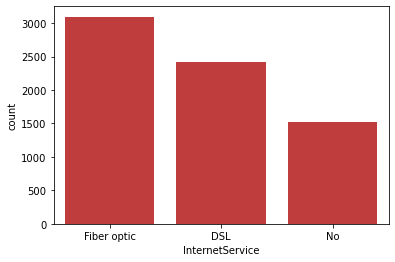

In [9]:
#look at Internet Service factor.
base_color = sb.color_palette()[3]
order = df['InternetService'].value_counts().index
sb.countplot(data= df, x= 'InternetService',color = base_color, order = order );

fiber optic is slightly higher than DSL

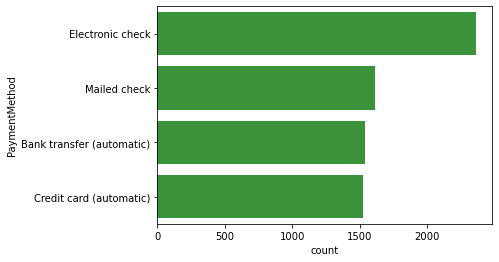

In [10]:
#look at Payment Method factor.
base_color = sb.color_palette()[2]
order = df['PaymentMethod'].value_counts().index
sb.countplot(data= df,y= 'PaymentMethod',color = base_color, order = order );

Electronic check have the highest number of customers compared to others.

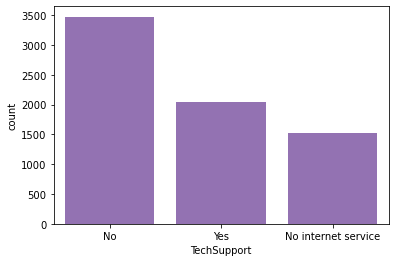

In [11]:
#look at TechSupport factor.
base_color = sb.color_palette()[4]
order = df['TechSupport'].value_counts().index
sb.countplot(data= df, x= 'TechSupport',color = base_color, order = order );

high number of customers not have techsupport.

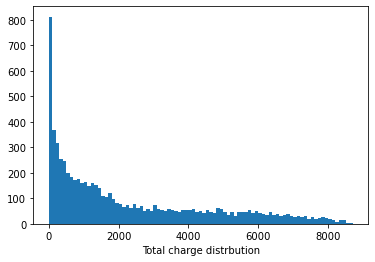

In [12]:
#look at Total charge distrbution.
bins= np.arange(0,df['TotalCharges'].max()+100,100)
plt.hist(df['TotalCharges'], bins= bins);
plt.xlabel('Total charge distrbution');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ratio of churn customers is approxmetly 27 % of total customers , these ratio it will be analysised with other factors  
> there is no any unusual point or any transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there is no any operations

## Bivariate Exploration


we looked at the univariate distribution of five features in the churn dataset. Now, we'll investigate relationships between these variables and churn coulmn of interest.

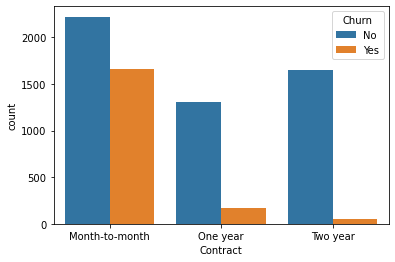

In [15]:
#look at Contract factor compared with Churn factor.
sb.countplot(data = df, x= 'Contract', hue = 'Churn');

we observed here that Month to month contract have the highest churn ratio , it observed that Month to month contract affect on churn percentage and there is a relationship.

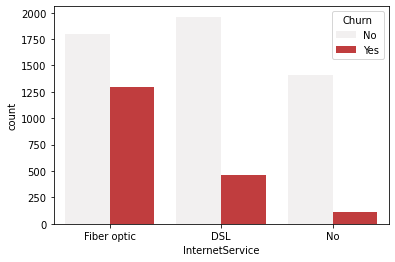

In [16]:
#look at Internet Service factor compared with Churn factor.
base_color= sb.color_palette()[3]
order = df['InternetService'].value_counts().index
sb.countplot(data = df, x= 'InternetService', hue = 'Churn',  order = order, color= base_color );

we observed here that fiber optic internet service have the highest churn ratio although it have high number of customers becouse it is faster, DSL have low churn ratio.so we can ask here WHY?

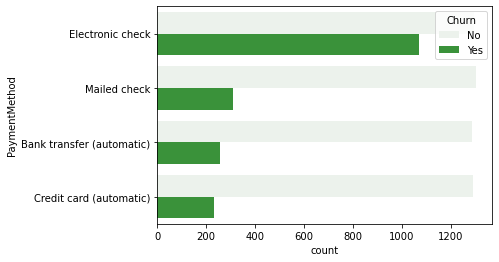

In [17]:
#look at Payment Method factor compared with Churn factor.
base_color = sb.color_palette()[2]
sb.countplot(data = df, y= 'PaymentMethod', hue = 'Churn', color= base_color);

Electronic check Payment Method observed that have the highest churn ratio although all other factors have the same number of non churn customers.

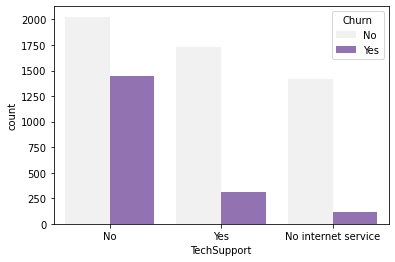

In [18]:
#look at TechSupport factor compared with Churn factor.
base_color = sb.color_palette()[4]
order = df['TechSupport'].value_counts().index
sb.countplot(data= df, x= 'TechSupport', hue = 'Churn' ,color = base_color, order = order );

observed that important to customers have TechSupport to prevent increasing churn ratio.

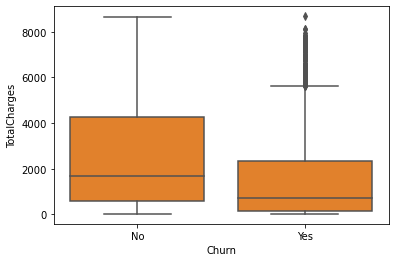

In [19]:
#look at Total Charges factor compared with Churn factor.
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'Churn', y = 'TotalCharges', color = base_color);

Distribution of churn customers TotalCharges have lots of outliers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>some have positive relation, monthly contracts, fibre optic internet services and Electronic check Payment Method can lead to higher churn rates

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> i didnot observe any interesting relationships between the other features.

## Multivariate Exploration


WE will investigate three variables (Internet Service , Payment Method , churn) 
> first we will invstigate relation between Internet Service and Payment Method
> , then compared them with churn customers.

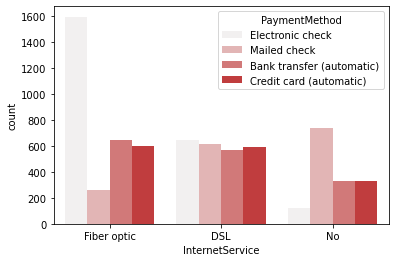

In [20]:
#look at InternetService and PaymentMethod factors.
base_color = sb.color_palette()[3]
order = df['InternetService'].value_counts().index
sb.countplot(data= df, x= 'InternetService',  hue = 'PaymentMethod' ,color = base_color, order = order );

high number of customers that have fibre optic internet services have Electronic check Payment Method.

C:\Users\Basma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Basma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Basma\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='InternetService', ylabel='PaymentMethod'>

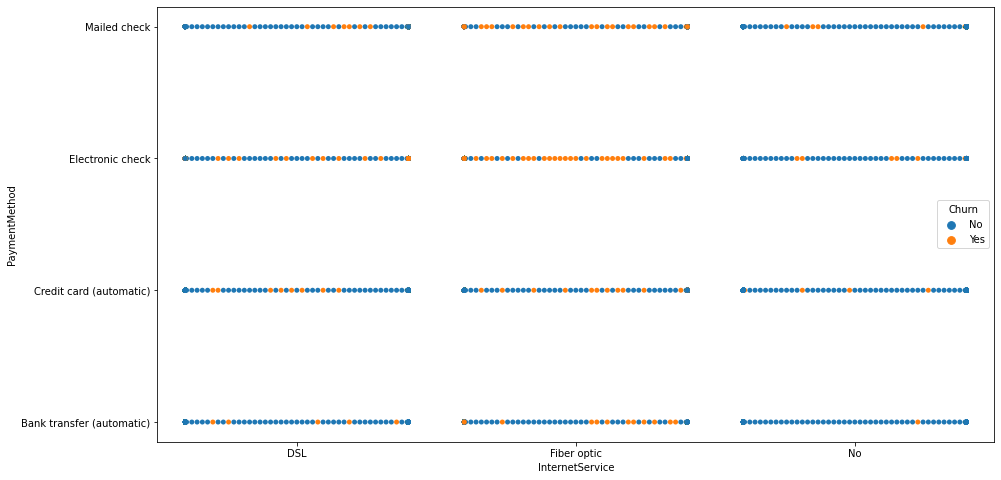

In [21]:
#investigate three variables (Internet Service , Payment Method , churn)
plt.figure(figsize=(15,8))
sb.swarmplot(data=df,x='InternetService',y='PaymentMethod',hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='PaymentMethod'>

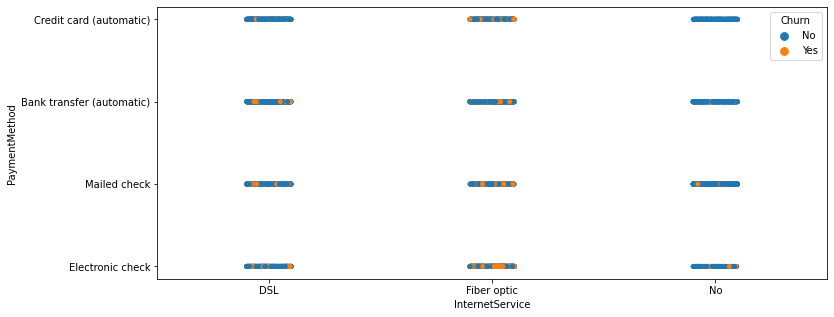

In [22]:
# anther way of investigation (Internet Service , Payment Method , churn)
plt.figure(figsize=(12,5))
sb.stripplot(data=df,x='InternetService',y='PaymentMethod',hue='Churn')

Customers that have both Electronic check Payment Method and fiber optic internet service have the highest churn ratio.
> And  fiber optic internet service affect on others factors assoiated with related to churn ratio. As well as Electronic check Payment Method

Next we will investigate the factors that affect on churn and relate with total charge.

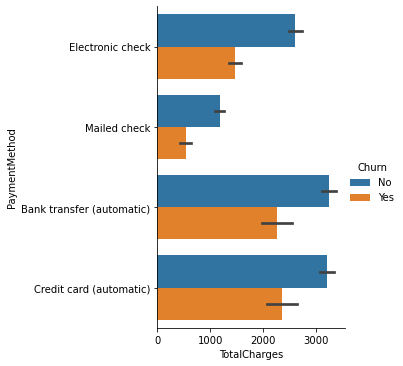

In [23]:
#look at PaymentMethod and TotalCharges factors compared with Churn factor.
sb.catplot(x="TotalCharges", y="PaymentMethod", hue="Churn",kind="bar", data=df)

Although Electronic check Payment Method has high effect on churn ,it not has high total charge.

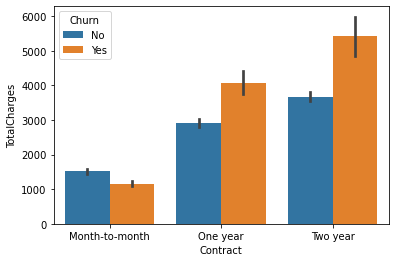

In [24]:
#look at Contract and TotalCharges factors compared with Churn factor.
sb.barplot(data = df, x= 'Contract', y= 'TotalCharges', hue = 'Churn');

Although month to month contract has high effect on churn ,it has the lowest total charge.

C:\Users\Basma\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


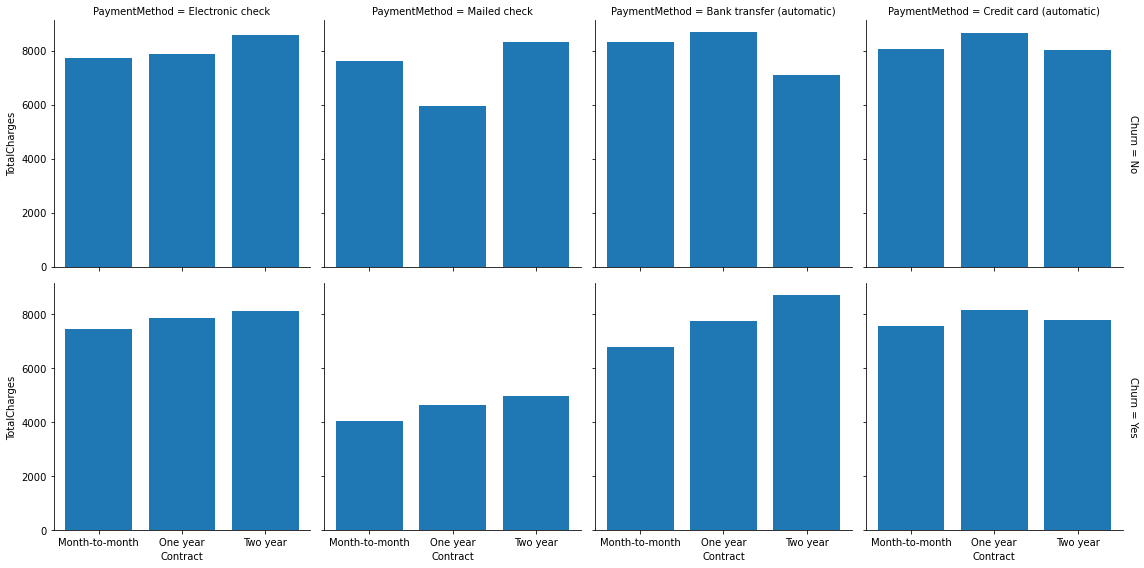

In [25]:
#look at Contract  and Payment Method factors compared with Churn factor.
g = sb.FacetGrid(data = df, col = 'PaymentMethod', row = 'Churn', size = 4, margin_titles = True)
g.map(plt.bar, 'Contract', 'TotalCharges')

i couldnot obtain a relationship.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
 > Customers that have both Electronic check Payment Method and fiber optic internet service have the highest churn ratio.

> And fiber optic internet service affect on others factors assoiated with related to churn ratio. As well as Electronic check Payment Method

### Were there any interesting or surprising interactions between features?

> Although Electronic check Payment Method and month to month contract  has high effect on churn ,it not has high total charge.